In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [4]:
# import Sales Price (Brooklyn, Manhattan, Queens)
houseprice_df = pd.read_csv('priceIndex_All.csv')
houseprice_df
houseprice_df['year'] = pd.DatetimeIndex(houseprice_df['Month']).year
houseprice_df_year = houseprice_df[['year']]

In [5]:
rentprice_df = pd.read_csv('rentalIndex_All.csv')


In [7]:
#house sell prices before, during and after covid
covidh_df = houseprice_df.loc[(houseprice_df['Month'] >= '2019-12-01')]

In [8]:
rentprice_df = pd.read_csv('rentalIndex_All.csv')
rentprice_df['year'] = pd.DatetimeIndex(rentprice_df['Month']).year
rentprice_df_year = rentprice_df[['year']]
rentprice_df.tail(5)

,Month,Brooklyn,Manhattan,NYC,Queens,year
181,2022-02-01,2834.0,3396.0,3019.0,2222.0,2022
182,2022-03-01,2872.0,3461.0,3067.0,2237.0,2022
183,2022-04-01,2917.0,3527.0,3121.0,2257.0,2022
184,2022-05-01,2963.0,3599.0,3182.0,2292.0,2022
185,2022-06-01,3022.0,3660.0,3242.0,2330.0,2022


Text(0.5, 1.0, 'Rent Price')

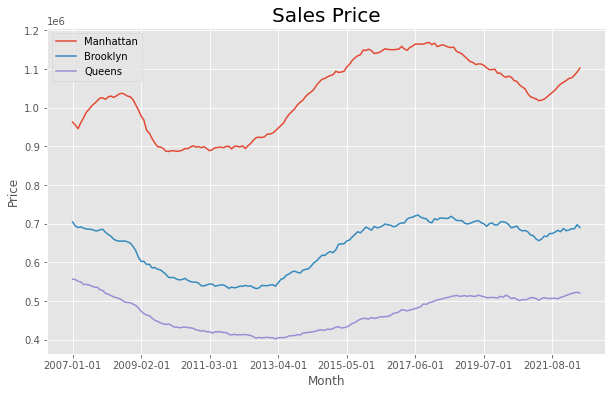

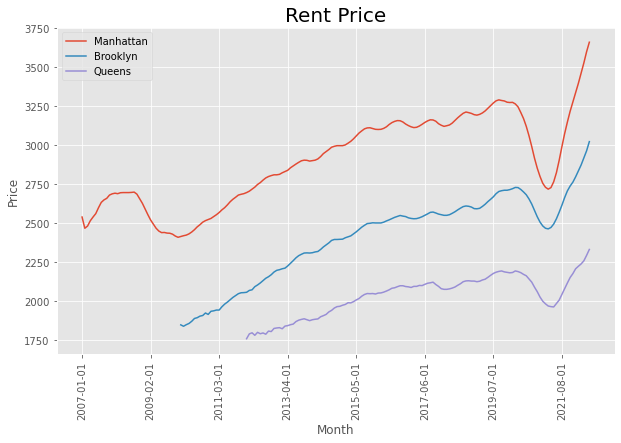

In [14]:
#plot rent and sell home prices from 2007-2021

houseprice_df = houseprice_df.loc[(houseprice_df['Month'] >= '2007-01-01')]
plt.rcParams['figure.figsize']=(10,6)
houseprice_df.plot(x='Month',y=['Manhattan','Brooklyn','Queens'],label = ['Manhattan','Brooklyn','Queens'])
plt.xlabel('Month') 
#plt.xticks(rotation='vertical')
plt.ylabel('Price')
plt.title('Sales Price', fontsize = 20)

plt.rcParams['figure.figsize']=(10,6)
rentprice_df.plot(x='Month',y=['Manhattan','Brooklyn','Queens'],label = ['Manhattan','Brooklyn','Queens'])
plt.xlabel('Month') 
plt.xticks(rotation='vertical')
plt.ylabel('Price')
plt.title('Rent Price', fontsize = 20)
#rentprice_df

In [10]:
covidr_df = rentprice_df.loc[(rentprice_df['Month'] >= '2019-12-01')]

Text(0.5, 1.0, 'Sell Price')

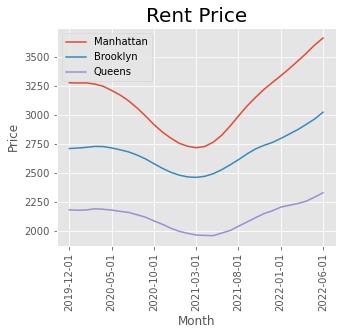

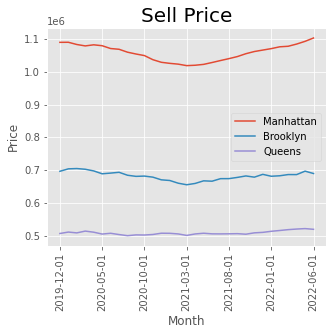

In [11]:
#price comparison between sell house and rent house - before and post pandemic (2019-2022)
plt.rcParams['figure.figsize']=(5,4)
covidr_df.plot(x='Month',y=['Manhattan','Brooklyn','Queens'],label = ['Manhattan','Brooklyn','Queens'])
plt.xlabel('Month') 
plt.xticks(rotation='vertical')
plt.ylabel('Price')
plt.title('Rent Price', fontsize = 20)

plt.rcParams['figure.figsize']=(5,4)
covidh_df.plot(x='Month',y=['Manhattan','Brooklyn','Queens'],label = ['Manhattan','Brooklyn','Queens'])
plt.xlabel('Month') 
plt.xticks(rotation='vertical')
plt.ylabel('Price')
plt.title('Sell Price', fontsize = 20)

In [12]:
#sell price pct change between lowest and highest - the sharp raise
postcovidh_df = covidh_df.loc[covidh_df['Month'].isin(['2021-03-01', '2022-06-01'])]
postcovidh_pct=postcovidh_df[['Manhattan','Brooklyn','Queens']].pct_change()

postcovidh_pct

,Manhattan,Brooklyn,Queens
194,NaN,NaN,NaN
209,0.082569,0.052148,0.036937


In [33]:
#rent price pct change between lowest and highest - the sharp raise
postcovidr_df = covidrent_df.loc[covidrent_df['Month'].isin(['2021-03-01', '2022-06-01'])]
postcovidr_df

postcovidr_pct=postcovidr_df[['Manhattan','Brooklyn','Queens']].pct_change()
postcovidr_pct

,Manhattan,Brooklyn,Queens
170,NaN,NaN,NaN
185,0.347074,0.227457,0.184545


In [34]:
#focus on rent price during 2021-03 to 2022-06  - the sharp raise 
covidrent_df = rentprice_df.loc[(rentprice_df['Month'] >= '2021-03-01')]

In [36]:
saleprice_df = pd.read_csv('medianSalesPrice_All.csv') #detailed sale prices 
salevol_df = pd.read_csv('recordedSalesVolume_All.csv') #volume of house sale
saleinven_df = pd.read_csv('totalInventory_All.csv') #sell hohuse inventory
rentinven_df = pd.read_csv('rentalInventory_All.csv') #rent inventory
nprop_df = pd.read_csv('Housing_New_York_Units_by_Building.csv') #new properties

In [39]:
nprop2022_df = nprop_df.loc[0:68,["Project Name","Project Start Date","Number","Borough","Total Units"]]
nprop2022_sum = nprop2022_df.groupby('Borough',as_index = False).sum()

In [31]:
#pull out data from 2022-03 to 2022-06 where the price raise sharply
sales_tf = saleprice_df.loc[5:,["areaName","Borough","2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"]]
vol_df = salevol_df.loc[5:,["areaName","Borough","2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"]]
inven_df = saleinven_df.loc[5:,["areaName","Borough","2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"]]
rentinven_df = rentinven_df.loc[5:,["areaName","Borough","2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"]]

covidr_df = rentprice_df.loc[(rentprice_df['Month'] >= '2021-12-01')]

sellprice_median = sales_tf.groupby('Borough',as_index=False).median() # median of recorded sales price 
salesvol_mean = vol_df.groupby('Borough',as_index=False).mean() # meann of recorded sales volume 
inven_mean = inven_df.groupby('Borough',as_index=False).mean() # mean of houseing inventory
rentinven_mean = rentinven_df.groupby('Borough',as_index=False).mean() #mean of rent inventory
sellprice_median

,Borough,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
0,Bronx,601750.0,577500.0,614750.0,572500.0,609125.0,590250.0,592500.0,347500.0
1,Brooklyn,990500.0,1005525.0,908750.0,940000.0,940000.0,980923.0,1055000.0,1006578.5
2,Manhattan,1140000.0,1202000.0,1230000.0,1212500.0,1095000.0,1175000.0,1150000.0,1270000.0
3,Queens,663740.0,661465.5,681113.5,675000.0,670000.0,652500.0,665000.0,512250.0
4,Staten Island,617500.0,600000.0,624800.0,630000.0,611500.0,637750.0,630000.0,650000.0


In [41]:
rentinven_mean.corrwith(inven_mean, axis = 1)
#correlation between rent house incentory and sell house inventory

0    0.393643
1    0.613916
2    0.901785
3   -0.528437
4    0.577004
dtype: float64

In [42]:
sellprice_median
sellprice_median.corrwith(inven_mean, axis = 1)
#correlation between sell price and sell house inventory

0   -0.656456
1    0.599570
2   -0.212910
3   -0.715595
4    0.444020
dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten Island')])

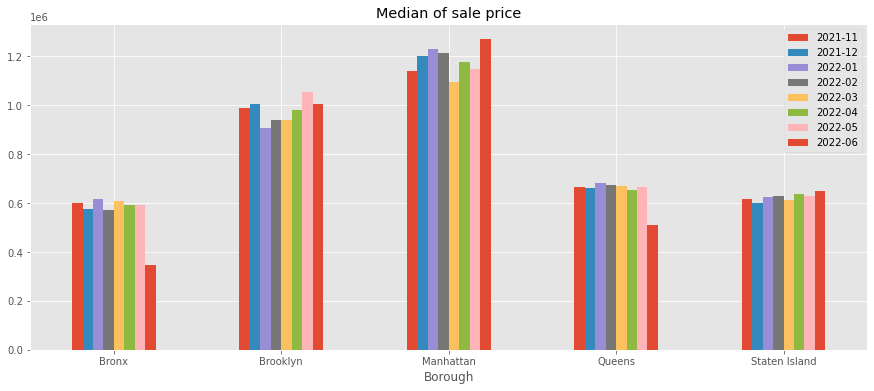

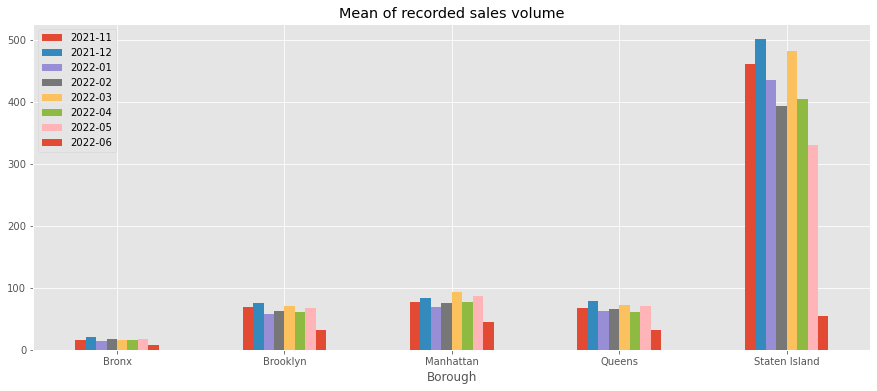

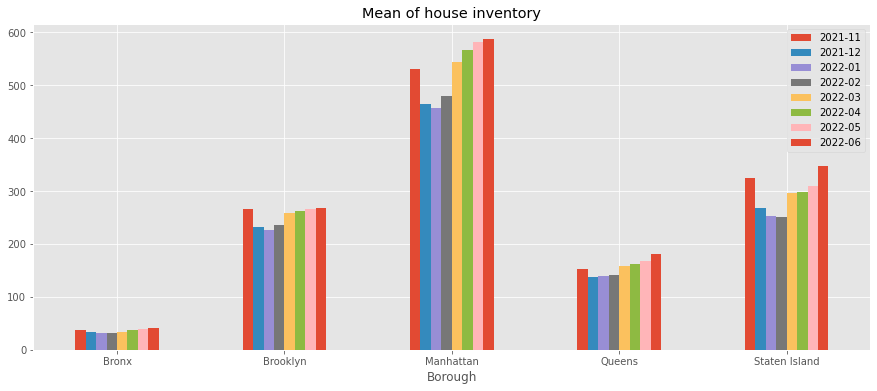

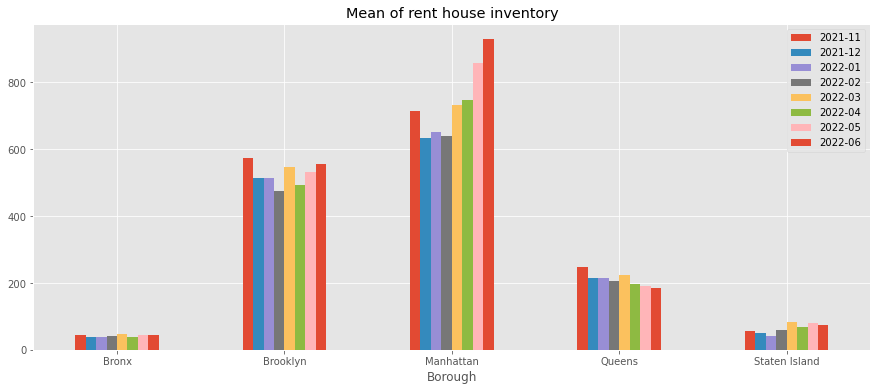

In [40]:
sellprice_median.plot(x='Borough', y=["2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"], kind="bar", figsize=(15,6),title='Median of sale price')
plt.xticks(rotation='horizontal')
salesvol_mean.plot(x='Borough', y=["2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"], kind="bar", figsize=(15,6),title='Mean of recorded sales volume')
plt.xticks(rotation='horizontal')
inven_mean.plot(x='Borough', y=["2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"], kind="bar", figsize=(15,6),title='Mean of house inventory')
plt.xticks(rotation='horizontal')
rentinven_mean.plot(x='Borough', y=["2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"], kind="bar", figsize=(15,6),title='Mean of rent house inventory')
plt.xticks(rotation='horizontal')

Text(0.5, 1.0, 'Fixed Rate Mortgage Average')

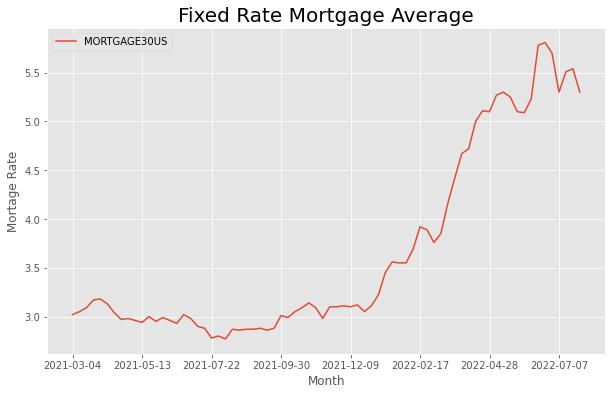

In [24]:
mortage_rate = pd.read_csv('MORTGAGE30US.csv') #Fixed Rate Mortgage Average 
mortage_rate
mortage_rate = mortage_rate.loc[(mortage_rate['DATE'] >= '2021-03-01')]

plt.rcParams['figure.figsize']=(10,6)
mortage_rate.plot(x='DATE',y=['MORTGAGE30US'])
plt.xlabel('Month') 
#plt.xticks(rotation='vertical')
plt.ylabel('Mortage Rate')
plt.title('Fixed Rate Mortgage Average', fontsize = 20)

Text(0.5, 1.0, 'Fixed Rate Mortgage Average')

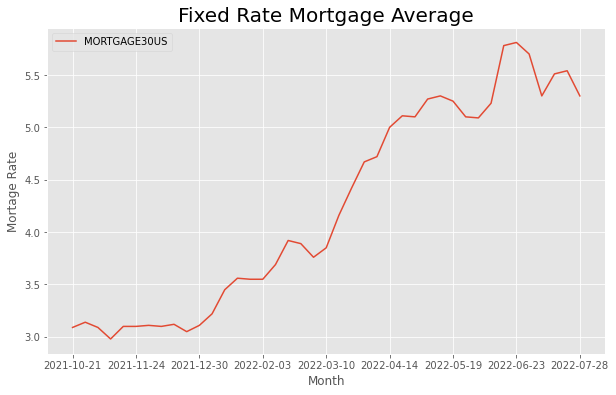

In [48]:
mortage_rate22 = mortage_rate.loc[(mortage_rate['DATE'] >= '2021-10-15')]

plt.rcParams['figure.figsize']=(10,6)
mortage_rate22.plot(x='DATE',y=['MORTGAGE30US'])
plt.xlabel('Month') 
#plt.xticks(rotation='vertical')
plt.ylabel('Mortage Rate')
plt.title('Fixed Rate Mortgage Average', fontsize = 20)

In [26]:
rentinven_df['April to June'] = rentinven_df['2022-06'] - rentinven_df['2022-04']
rentinven_df.nsmallest(20, 'April to June')

,areaName,Borough,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,April to June
150,Queens,Queens,4958,4293,4267,4121,4475,3923,3790,3672,-251
165,South Brooklyn,Brooklyn,2926,2576,2644,2695,2908,2493,2622,2364,-129
35,Central Queens,Queens,1546,1254,1253,1209,1420,1212,1170,1109,-103
9,Bay Ridge,Brooklyn,434,389,360,329,369,327,243,238,-89
5,Astoria,Queens,1652,1399,1279,1192,1167,1006,894,940,-66
131,Northeast Queens,Queens,586,561,642,707,783,667,662,602,-65
153,Rego Park,Queens,239,207,162,162,221,196,165,145,-51
133,Northwest Queens,Queens,2507,2195,2054,1890,1918,1694,1614,1645,-49
98,Kew Gardens,Queens,135,153,154,173,159,141,110,101,-40
28,Bushwick,Brooklyn,1425,1303,1244,1153,1524,1357,1205,1327,-30


In [27]:
inven_larg = rentinven_df.nlargest(10, 'April to June')
inven_larg

,areaName,Borough,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,April to June
126,NYC,NaN,28255,25031,25320,24346,27680,26215,28788,30262,4047
108,Manhattan,Manhattan,11787,10438,10740,10548,12079,12326,14183,15336,3010
24,Brooklyn,Brooklyn,10531,9438,9432,8727,10020,9060,9751,10217,1157
181,Upper East Side,Manhattan,1806,1450,1445,1352,1562,1689,1959,2337,648
129,North Brooklyn,Brooklyn,1101,1041,1132,1011,1263,1090,1275,1566,476
63,East Village,Manhattan,581,583,667,604,707,800,1067,1225,425
182,Upper West Side,Manhattan,1353,1245,1315,1313,1517,1585,1789,1985,400
57,East Brooklyn,Brooklyn,4430,3972,3761,3145,3869,3497,3642,3891,394
192,Williamsburg,Brooklyn,889,856,920,807,994,868,1012,1212,344
132,Northwest Brooklyn,Brooklyn,1143,1045,1090,1144,1217,1243,1400,1503,260


In [28]:
nprop2022_sum #new properties from 2022-01 to 2022-03

,Borough,Total Units
0,Bronx,686
1,Brooklyn,971
2,Manhattan,467
3,Queens,94
4,Staten Island,5
